In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

df1 = pd.read_csv('GOOG.csv')  #Google share price

In [50]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-08,146.864517,149.081207,146.132263,147.143463,147.143463,13276100
1,2005-09-09,148.084946,148.991547,147.726288,148.986557,148.986557,8813800
2,2005-09-12,150.311600,155.128540,149.937988,154.291672,154.291672,20850700
3,2005-09-13,153.923065,157.175873,152.513336,155.258057,155.258057,20676900
4,2005-09-14,153.788559,156.055069,149.589310,150.934265,150.934265,22636000


In [51]:
df1.Date = pd.to_datetime(df1.Date)
df1 = df1.set_index("Date")   #set date column as index


In [54]:

df = df1.loc[:, ["Close"]]

In [55]:
df

,Close
0,147.143463
1,148.986557
2,154.291672
3,155.258057
4,150.934265
...,...
3770,1634.180054
3771,1660.709961
3772,1728.280029
3773,1641.839966


In [56]:
train, test = df[:-12], df[-12:]

In [57]:
df.shape

(3775, 1)

In [58]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [59]:
train.shape

(3763, 1)

In [60]:
n_input = 30
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=90)

Epoch 1/90
623/623 [==============================] - 11s 17ms/step - loss: 0.0031
Epoch 2/90
623/623 [==============================] - 12s 19ms/step - loss: 0.0015
Epoch 3/90
623/623 [==============================] - 12s 19ms/step - loss: 9.0732e-04
Epoch 4/90
623/623 [==============================] - 12s 19ms/step - loss: 9.1100e-04
Epoch 5/90
623/623 [==============================] - 12s 19ms/step - loss: 9.9626e-04
Epoch 6/90
623/623 [==============================] - 12s 19ms/step - loss: 7.5286e-04
Epoch 7/90
623/623 [==============================] - 11s 18ms/step - loss: 6.7748e-04
Epoch 8/90
623/623 [==============================] - 13s 20ms/step - loss: 8.0781e-04
Epoch 9/90
623/623 [==============================] - 14s 22ms/step - loss: 7.0496e-04
Epoch 10/90
623/623 [==============================] - 12s 20ms/step - loss: 5.8081e-04
Epoch 11/90
623/623 [==============================] - 12s 20ms/step - loss: 4.8722e-04
Epoch 12/90
623/623 [============================

In [61]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [62]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


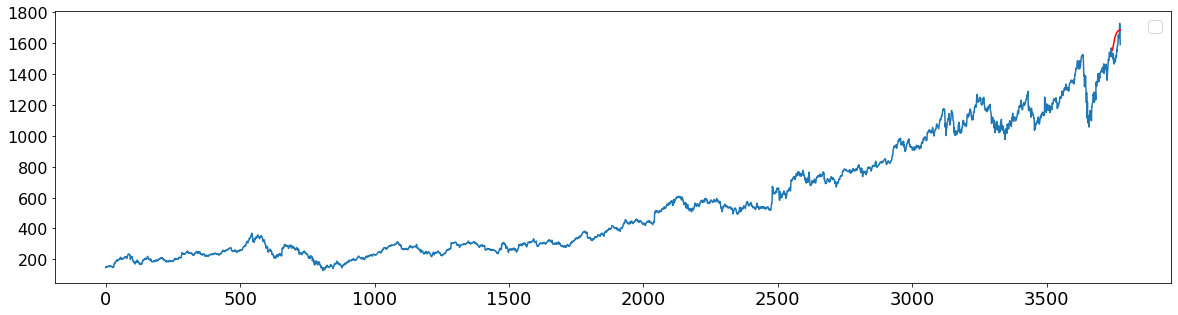

In [63]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Close'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [64]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [104.72048964]


In [65]:
train = df

In [66]:
scaler.fit(train)
train = scaler.transform(train)

In [67]:
n_input = 30
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [68]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
625/625 [==============================] - 13s 20ms/step - loss: 3.6385e-04
Epoch 2/90
625/625 [==============================] - 12s 19ms/step - loss: 3.4853e-04
Epoch 3/90
625/625 [==============================] - 13s 20ms/step - loss: 3.5934e-04
Epoch 4/90
625/625 [==============================] - 13s 21ms/step - loss: 4.0159e-04
Epoch 5/90
625/625 [==============================] - 13s 21ms/step - loss: 3.6741e-04
Epoch 6/90
625/625 [==============================] - 13s 20ms/step - loss: 3.5839e-04
Epoch 7/90
625/625 [==============================] - 12s 19ms/step - loss: 3.5578e-04
Epoch 8/90
625/625 [==============================] - 12s 19ms/step - loss: 3.6045e-04
Epoch 9/90
625/625 [==============================] - 12s 19ms/step - loss: 3.6335e-04
Epoch 10/90
625/625 [==============================] - 13s 21ms/step - loss: 3.2730e-04
Epoch 11/90
625/625 [==============================] - 12s 20ms/step - loss: 3.9152e-04
Epoch 12/90
625/625 [====================

In [69]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [82]:
#df1.Date = pd.to_datetime(df1.Date)
#df1 = df1.set_index("Date")   #set date column as index


from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + x for x in range(0,31) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [83]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


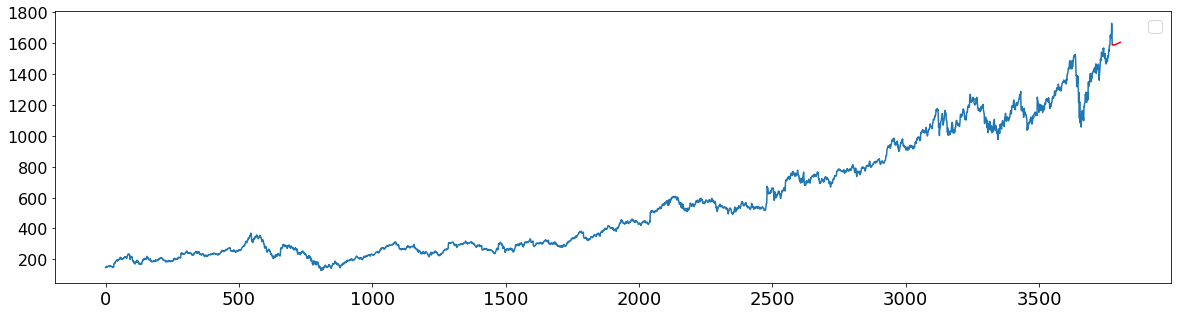

In [84]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['Close'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

our Prediction model shows decrease in Alphabet share px in next month